## Introduction
In this notebook we will preprocess the data for the cardiac detection task.
We provide bounding boxes for around 500 images of the RSNA pneumonia detection challenge dataset which you have already downloaded in the last section. 

We will again convert the images to npy files for efficient storage and faster data loading.

## Imports

* pathlib for easy path handling
* pydicom for reading dicom files
* numpy for storing the actual images
* cv2 for directly resizing the images
* pandas to read the provided labels
* matplotlib for visualization
* patches from matplotlib to draw bounding boxes

In [1]:
from pathlib import Path
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

At first, we read the csv file containing the labels.

In [2]:
labels = pd.read_csv("./rsna_heart_detection.csv")

In [3]:
labels.head(10)

,label,x0,y0,w,h,name,img_shape_x,img_shape_y
0,heart,91,71,77,102,ca112a3c-b701-48b8-a94f-725ea65416a7,224,224
1,heart,70,64,89,67,e5f292ae-f1e5-497c-b0a0-68f1aa2196b2,224,224
2,heart,82,55,81,76,67af68f7-7ba0-49a0-a373-3a8801eb0faa,224,224
3,heart,93,74,78,89,814289a3-9ce8-4cba-842f-45d6a36f540d,224,224
4,heart,85,61,85,93,e508969f-c931-462b-aa90-ccde34a4d9e5,224,224
5,heart,63,60,100,85,f1e96436-85c2-4179-b7e9-3f3091e29d76,224,224
6,heart,102,87,60,61,a20a3112-7585-430c-b648-8d81d301acbf,224,224
7,heart,85,71,77,77,eb31f994-518b-4e9d-9a52-ccbf541cfa9f,224,224
8,heart,89,65,71,85,4cf82164-6678-4864-bbc4-5a93419424f7,224,224
9,heart,84,65,76,72,e20af8e8-56f2-486f-962e-7706d77dc5f5,224,224


In [4]:
ROOT_PATH = Path("C:/Users/muaaz/Downloads/rsna_pneumonia-detection-challenge/rsna-pneumonia-detection-challenge/stage_2_train_images")
SAVE_PATH = Path("C:/Users/muaaz/Downloads/rsna_pneumonia-detection-challenge/rsna-pneumonia-detection-challenge/Processed Heart Detection")

Let's visualize some images with corresponding bounding boxes around the heart
<br> use `break` to better understand the for loops

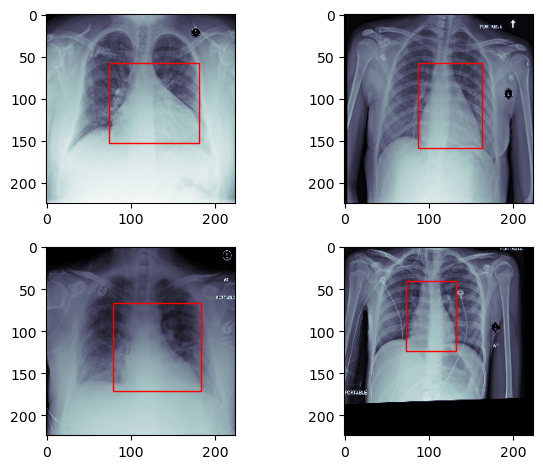

In [14]:
fig, axis = plt.subplots(2, 2)
c = 0
for i in range(2):
    for j in range(2):
        data = labels.iloc[c+30]
        # It creates the intended image path to be read
        patient_id = data["name"]
        dcm_path = ROOT_PATH/str(patient_id)
        dcm_path = dcm_path.with_suffix(".dcm")

        # Now, we are first reading it and then extracting the 2D array of image date
        dcm = pydicom.dcmread(dcm_path)
        dcm_array = dcm.pixel_array
        dcm_array = cv2.resize(dcm_array, (224, 224))

        # We cannot use labels[c] - you can test it
        data = labels.iloc[c+30]
        x = data["x0"]
        y = data["y0"]
        width = data["w"]
        height = data["h"]
        
        axis[i][j].imshow(dcm_array, cmap="bone")
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor='none')
        axis[i][j].add_patch(rect)
        c+=1

plt.tight_layout()
        
#You can put your test code here
#print(labels.dtypes)

We use a similar preprocessing routine to the one used for the classification task.<br />
To be able to distinguish between train and validation subjects, we store them in two lists and later save these lists.

In [15]:
len(labels)

496

In [8]:
#you can also try labels.h or labels.name
list(labels.name)

['ca112a3c-b701-48b8-a94f-725ea65416a7',
 'e5f292ae-f1e5-497c-b0a0-68f1aa2196b2',
 '67af68f7-7ba0-49a0-a373-3a8801eb0faa',
 '814289a3-9ce8-4cba-842f-45d6a36f540d',
 'e508969f-c931-462b-aa90-ccde34a4d9e5',
 'f1e96436-85c2-4179-b7e9-3f3091e29d76',
 'a20a3112-7585-430c-b648-8d81d301acbf',
 'eb31f994-518b-4e9d-9a52-ccbf541cfa9f',
 '4cf82164-6678-4864-bbc4-5a93419424f7',
 'e20af8e8-56f2-486f-962e-7706d77dc5f5',
 '7f148dfd-80a6-4bef-adc3-d0de8968de74',
 '01ef1712-90a6-4946-ad86-fc76b0cf2d3b',
 '39148a82-bab6-4529-9e66-9b28e8110a8c',
 'd8e5c4af-eb12-45ac-bef7-52067018cc2a',
 'c803f210-4cf1-4914-8399-5950ee8b95d2',
 '799f9a2a-9f6a-4a84-b1e4-e0e6119122bf',
 '79cb22b9-a291-44a2-a1f5-7d51a256e37c',
 '59356ce0-39e8-46c2-942c-bab047e62b4a',
 'e3a261d3-0cfe-4e75-ab0b-1dfd45a9991b',
 '968cdc9c-b3e8-4d54-a2ec-a0932b1ffe35',
 'fe88e494-9645-40b5-bcad-670b8426c9a0',
 '1d5af9ab-1f62-47b2-980f-71e8409d7c3c',
 '52407dba-597d-4eaf-b6b8-b74ec0c1a136',
 '702c610f-8655-4062-a914-5b82fcb71be2',
 '51c1d1a2-5cb8-

***Side Note***, For `assert`, see this: https://www.w3schools.com/python/ref_keyword_assert.asp

In [16]:
x = "hello"

#if condition returns True, then nothing happens:
assert x == "hello"

#if condition returns False, AssertionError is raised:

assert x == "goodbye"

In [17]:
assert x != "hello", "x should be 'hello'"

AssertionError: x should be 'hello'

In [18]:
sums = 0
sums_squared = 0
train_ids = []
val_ids = []

for counter, patient_id in enumerate(list(labels.name)):  
    dcm_path = ROOT_PATH/patient_id  # Create the path to the dcm file
    dcm_path = dcm_path.with_suffix(".dcm")  # And add the .dcm suffix
    
    dcm = pydicom.dcmread(dcm_path)  # Read the dicom file with pydicom
    
     # Retrieve the actual image 
    dcm_array = dcm.pixel_array
    assert dcm_array.shape == (1024, 1024)
    
    # Resize the image to drastically improve training speed
    # In order to reduce the space when storing the image we convert it to float16
    # Standardize to 0-1 range
    dcm_array = (cv2.resize(dcm_array, (224, 224)) / 255).astype(np.float16)
            
    # 4/5 train split, 1/5 val split
    train_or_val = "train" if counter < 400 else "val" 
    
    # Add to corresponding train or validation patient index list
    if train_or_val == "train":
        train_ids.append(patient_id)
    else:
        val_ids.append(patient_id)
    
    current_save_path = SAVE_PATH/train_or_val # Define save path and create if necessary
    current_save_path.mkdir(parents=True, exist_ok=True)
    
    np.save(current_save_path/patient_id, dcm_array)  # Save the array in the corresponding directory
    
    normalizer = dcm_array.shape[0] * dcm_array.shape[1]  # Normalize sum of image
    if train_or_val == "train":  # Only use train data to compute dataset statistics
        sums += np.sum(dcm_array) / normalizer
        sums_squared += (np.power(dcm_array, 2).sum()) / normalizer


Add an `IF STATEMENT` with `break` at the end of the code to break the code at 5th loop because we want to assess some parameters within that specific loop

Remember that you need to get rid of `break` if you want to go through all the loops later. 

In [19]:
sums

197.72066326530597

Finally we store the train and val subject ids
<br> for more information about `np.save` refer to https://numpy.org/doc/stable/reference/generated/numpy.save.html

In [20]:
train_det_path = Path('train_subjects_det')
val_det_path = Path('train_subjects_det')

# Create the folder
train_det_path.mkdir(parents=True, exist_ok=True)
val_det_path.mkdir(parents=True, exist_ok=True)

In [21]:
np.save("train_subjects_det", train_ids)
np.save("val_subjects_det", val_ids)

In [22]:
mean = sums / len(train_ids)
std = np.sqrt(sums_squared / len(train_ids) - (mean**2), dtype=np.float64)

In [23]:
print(f"Mean of Dataset: {mean}, STD: {std}")

Mean of Dataset: 0.49430165816326493, STD: 0.2527964897943661


------